In [1]:
import os, sys
import importlib

from utils import load, vis, models, models_LSTM, process

Using TensorFlow backend.
/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
importlib.reload(vis)

data_folder = "data/simplified/"
#access_file_generator = map(lambda x : data_folder + x + '.csv', load.classes)
afg2 = map(lambda x : data_folder + x + '.csv', load.classes)

In [3]:
data = process.SeqGenerator(afg2)
gen2 = data.generateSeq()

In [4]:
import numpy as np
x_val,y_val = next(gen2)
for i in range(9):
    x,y = next(gen2)
    x_val = np.concatenate((x_val,x),axis = 0)
    y_val = np.concatenate((y_val,y),axis = 0)
validate = (x_val,y_val)

x_test,y_test = next(gen2)
for i in range(999):
    x,y = next(gen2)
    x_test = np.concatenate((x_test,x),axis = 0)
    y_test = np.concatenate((y_test,y),axis = 0)

In [5]:
importlib.reload(models_LSTM)

model2 = models_LSTM.DoodleLSTM((None,3), data.n_classes)
model2.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics=['accuracy'])
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, None, 3)           12        
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 48)          768       
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 48)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 64)          15424     
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 64)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, None, 96)          18528     
_________________________________________________________________
dropout_3 (Dropout)          (None, None, 96)          0         
__________

In [6]:
history = model2.fit_generator(generator=gen2, epochs=639, steps_per_epoch=10, validation_data = validate)

Epoch 1/639
10/10 [==============================] - 4s 371ms/step - loss: 2.0790 - acc: 0.1680 - val_loss: 2.0298 - val_acc: 0.1609
Epoch 2/639
10/10 [==============================] - 1s 76ms/step - loss: 2.0673 - acc: 0.1547 - val_loss: 2.0328 - val_acc: 0.1531
Epoch 3/639
10/10 [==============================] - 1s 115ms/step - loss: 1.9257 - acc: 0.2031 - val_loss: 2.0587 - val_acc: 0.1961
Epoch 4/639
10/10 [==============================] - 1s 116ms/step - loss: 1.9253 - acc: 0.2242 - val_loss: 1.8731 - val_acc: 0.2062
Epoch 5/639
10/10 [==============================] - 1s 123ms/step - loss: 1.7997 - acc: 0.2461 - val_loss: 1.7429 - val_acc: 0.2664
Epoch 6/639
10/10 [==============================] - 1s 114ms/step - loss: 1.7300 - acc: 0.2938 - val_loss: 1.7078 - val_acc: 0.3320
Epoch 7/639
10/10 [==============================] - 1s 109ms/step - loss: 1.6946 - acc: 0.3047 - val_loss: 1.7406 - val_acc: 0.2797
Epoch 8/639
10/10 [==============================] - 1s 115ms/step - l

10/10 [==============================] - 1s 114ms/step - loss: 1.3680 - acc: 0.4664 - val_loss: 1.3947 - val_acc: 0.4727
Epoch 63/639
10/10 [==============================] - 1s 139ms/step - loss: 1.3467 - acc: 0.4867 - val_loss: 1.3517 - val_acc: 0.5039
Epoch 64/639
10/10 [==============================] - 1s 127ms/step - loss: 1.3354 - acc: 0.4852 - val_loss: 1.3334 - val_acc: 0.5133
Epoch 65/639
10/10 [==============================] - 1s 131ms/step - loss: 1.3466 - acc: 0.4992 - val_loss: 1.3354 - val_acc: 0.4953
Epoch 66/639
10/10 [==============================] - 1s 112ms/step - loss: 1.3509 - acc: 0.4828 - val_loss: 1.3592 - val_acc: 0.4820
Epoch 67/639
10/10 [==============================] - 1s 112ms/step - loss: 1.3548 - acc: 0.4930 - val_loss: 1.3265 - val_acc: 0.5039
Epoch 68/639
10/10 [==============================] - 1s 122ms/step - loss: 1.2964 - acc: 0.4984 - val_loss: 1.3220 - val_acc: 0.5070
Epoch 69/639
10/10 [==============================] - 1s 120ms/step - loss:

10/10 [==============================] - 1s 112ms/step - loss: 0.9062 - acc: 0.7016 - val_loss: 0.8736 - val_acc: 0.7016
Epoch 124/639
10/10 [==============================] - 1s 106ms/step - loss: 0.8695 - acc: 0.6937 - val_loss: 0.8346 - val_acc: 0.7172
Epoch 125/639
10/10 [==============================] - 1s 126ms/step - loss: 0.9124 - acc: 0.7000 - val_loss: 0.8673 - val_acc: 0.7102
Epoch 126/639
10/10 [==============================] - 1s 114ms/step - loss: 0.8759 - acc: 0.6953 - val_loss: 0.8479 - val_acc: 0.7195
Epoch 127/639
10/10 [==============================] - 1s 110ms/step - loss: 0.8924 - acc: 0.6906 - val_loss: 0.8485 - val_acc: 0.7273
Epoch 128/639
10/10 [==============================] - 1s 108ms/step - loss: 0.8500 - acc: 0.7023 - val_loss: 0.8398 - val_acc: 0.7305
Epoch 129/639
10/10 [==============================] - 1s 115ms/step - loss: 0.8854 - acc: 0.6984 - val_loss: 0.8537 - val_acc: 0.7094
Epoch 130/639
10/10 [==============================] - 1s 109ms/step 

Epoch 184/639
10/10 [==============================] - 1s 123ms/step - loss: 0.6629 - acc: 0.7945 - val_loss: 0.5733 - val_acc: 0.8266
Epoch 185/639
10/10 [==============================] - 1s 133ms/step - loss: 0.6639 - acc: 0.7820 - val_loss: 0.5828 - val_acc: 0.8133
Epoch 186/639
10/10 [==============================] - 1s 108ms/step - loss: 0.6374 - acc: 0.7945 - val_loss: 0.5947 - val_acc: 0.8133
Epoch 187/639
10/10 [==============================] - 1s 128ms/step - loss: 0.6593 - acc: 0.7766 - val_loss: 0.5796 - val_acc: 0.8109
Epoch 188/639
10/10 [==============================] - 1s 111ms/step - loss: 0.6606 - acc: 0.7859 - val_loss: 0.5589 - val_acc: 0.8234
Epoch 189/639
10/10 [==============================] - 1s 121ms/step - loss: 0.6597 - acc: 0.7906 - val_loss: 0.5809 - val_acc: 0.8125
Epoch 190/639
10/10 [==============================] - 1s 118ms/step - loss: 0.6393 - acc: 0.7859 - val_loss: 0.5900 - val_acc: 0.8063
Epoch 191/639
10/10 [==============================] - 

Epoch 245/639
10/10 [==============================] - 1s 111ms/step - loss: 0.5409 - acc: 0.8258 - val_loss: 0.4628 - val_acc: 0.8609
Epoch 246/639
10/10 [==============================] - 1s 112ms/step - loss: 0.4645 - acc: 0.8414 - val_loss: 0.4670 - val_acc: 0.8586
Epoch 247/639
10/10 [==============================] - 1s 123ms/step - loss: 0.5148 - acc: 0.8391 - val_loss: 0.4303 - val_acc: 0.8586
Epoch 248/639
10/10 [==============================] - 1s 108ms/step - loss: 0.4919 - acc: 0.8406 - val_loss: 0.4585 - val_acc: 0.8523
Epoch 249/639
10/10 [==============================] - 1s 119ms/step - loss: 0.5238 - acc: 0.8320 - val_loss: 0.4380 - val_acc: 0.8688
Epoch 250/639
10/10 [==============================] - 1s 117ms/step - loss: 0.4666 - acc: 0.8383 - val_loss: 0.4669 - val_acc: 0.8516
Epoch 251/639
10/10 [==============================] - 1s 117ms/step - loss: 0.5030 - acc: 0.8352 - val_loss: 0.4654 - val_acc: 0.8578
Epoch 252/639
10/10 [==============================] - 

Epoch 306/639
10/10 [==============================] - 1s 120ms/step - loss: 0.4750 - acc: 0.8500 - val_loss: 0.3972 - val_acc: 0.8797
Epoch 307/639
10/10 [==============================] - 1s 119ms/step - loss: 0.4856 - acc: 0.8438 - val_loss: 0.3504 - val_acc: 0.8875
Epoch 308/639
10/10 [==============================] - 1s 124ms/step - loss: 0.4886 - acc: 0.8438 - val_loss: 0.3539 - val_acc: 0.8859
Epoch 309/639
10/10 [==============================] - 1s 110ms/step - loss: 0.4708 - acc: 0.8523 - val_loss: 0.3603 - val_acc: 0.8914
Epoch 310/639
10/10 [==============================] - 1s 116ms/step - loss: 0.4162 - acc: 0.8672 - val_loss: 0.3712 - val_acc: 0.8828
Epoch 311/639
10/10 [==============================] - 1s 115ms/step - loss: 0.4085 - acc: 0.8680 - val_loss: 0.3519 - val_acc: 0.8875
Epoch 312/639
10/10 [==============================] - 1s 113ms/step - loss: 0.4021 - acc: 0.8648 - val_loss: 0.3741 - val_acc: 0.8742
Epoch 313/639
10/10 [==============================] - 

Epoch 367/639
10/10 [==============================] - 1s 114ms/step - loss: 0.3558 - acc: 0.8812 - val_loss: 0.3079 - val_acc: 0.9031
Epoch 368/639
10/10 [==============================] - 1s 111ms/step - loss: 0.3958 - acc: 0.8711 - val_loss: 0.3395 - val_acc: 0.8961
Epoch 369/639
10/10 [==============================] - 1s 111ms/step - loss: 0.4010 - acc: 0.8797 - val_loss: 0.3516 - val_acc: 0.8922
Epoch 370/639
10/10 [==============================] - 1s 117ms/step - loss: 0.3449 - acc: 0.8859 - val_loss: 0.3226 - val_acc: 0.9070
Epoch 371/639
10/10 [==============================] - 1s 111ms/step - loss: 0.3924 - acc: 0.8836 - val_loss: 0.3044 - val_acc: 0.9055
Epoch 372/639
10/10 [==============================] - 1s 115ms/step - loss: 0.3842 - acc: 0.8781 - val_loss: 0.3116 - val_acc: 0.9086
Epoch 373/639
10/10 [==============================] - 1s 113ms/step - loss: 0.3752 - acc: 0.8867 - val_loss: 0.3046 - val_acc: 0.9078
Epoch 374/639
10/10 [==============================] - 

Epoch 428/639
10/10 [==============================] - 1s 113ms/step - loss: 0.3476 - acc: 0.8930 - val_loss: 0.3089 - val_acc: 0.8992
Epoch 429/639
10/10 [==============================] - 1s 135ms/step - loss: 0.3460 - acc: 0.8992 - val_loss: 0.2972 - val_acc: 0.9078
Epoch 430/639
10/10 [==============================] - 1s 118ms/step - loss: 0.3601 - acc: 0.8773 - val_loss: 0.3181 - val_acc: 0.9039
Epoch 431/639
10/10 [==============================] - 1s 108ms/step - loss: 0.3482 - acc: 0.8938 - val_loss: 0.3137 - val_acc: 0.9023
Epoch 432/639
10/10 [==============================] - 1s 117ms/step - loss: 0.3562 - acc: 0.8781 - val_loss: 0.3022 - val_acc: 0.9039
Epoch 433/639
10/10 [==============================] - 1s 111ms/step - loss: 0.3797 - acc: 0.8758 - val_loss: 0.2848 - val_acc: 0.9117
Epoch 434/639
10/10 [==============================] - 1s 112ms/step - loss: 0.3669 - acc: 0.8883 - val_loss: 0.2971 - val_acc: 0.9078
Epoch 435/639
10/10 [==============================] - 

Epoch 489/639
10/10 [==============================] - 1s 136ms/step - loss: 0.3450 - acc: 0.8961 - val_loss: 0.2583 - val_acc: 0.9258
Epoch 490/639
10/10 [==============================] - 1s 128ms/step - loss: 0.2805 - acc: 0.9187 - val_loss: 0.2677 - val_acc: 0.9187
Epoch 491/639
10/10 [==============================] - 1s 127ms/step - loss: 0.3346 - acc: 0.9031 - val_loss: 0.2704 - val_acc: 0.9234
Epoch 492/639
10/10 [==============================] - 1s 129ms/step - loss: 0.3644 - acc: 0.8820 - val_loss: 0.2802 - val_acc: 0.9141
Epoch 493/639
10/10 [==============================] - 1s 115ms/step - loss: 0.3053 - acc: 0.9086 - val_loss: 0.2470 - val_acc: 0.9258
Epoch 494/639
10/10 [==============================] - 1s 111ms/step - loss: 0.3678 - acc: 0.8797 - val_loss: 0.2682 - val_acc: 0.9187
Epoch 495/639
10/10 [==============================] - 1s 110ms/step - loss: 0.2966 - acc: 0.9164 - val_loss: 0.2642 - val_acc: 0.9266
Epoch 496/639
10/10 [==============================] - 

Epoch 550/639
10/10 [==============================] - 1s 115ms/step - loss: 0.3040 - acc: 0.9117 - val_loss: 0.2710 - val_acc: 0.9133
Epoch 551/639
10/10 [==============================] - 1s 117ms/step - loss: 0.3069 - acc: 0.9039 - val_loss: 0.2582 - val_acc: 0.9195
Epoch 552/639
10/10 [==============================] - 1s 112ms/step - loss: 0.2775 - acc: 0.9070 - val_loss: 0.2680 - val_acc: 0.9219
Epoch 553/639
10/10 [==============================] - 1s 113ms/step - loss: 0.3136 - acc: 0.9031 - val_loss: 0.2673 - val_acc: 0.9125
Epoch 554/639
10/10 [==============================] - 1s 110ms/step - loss: 0.2974 - acc: 0.8992 - val_loss: 0.2554 - val_acc: 0.9219
Epoch 555/639
10/10 [==============================] - 1s 122ms/step - loss: 0.3019 - acc: 0.9047 - val_loss: 0.2699 - val_acc: 0.9164
Epoch 556/639
10/10 [==============================] - 1s 110ms/step - loss: 0.2652 - acc: 0.9164 - val_loss: 0.2660 - val_acc: 0.9219
Epoch 557/639
10/10 [==============================] - 

Epoch 611/639
10/10 [==============================] - 1s 128ms/step - loss: 0.2763 - acc: 0.9094 - val_loss: 0.2717 - val_acc: 0.9172
Epoch 612/639
10/10 [==============================] - 1s 115ms/step - loss: 0.2607 - acc: 0.9227 - val_loss: 0.2826 - val_acc: 0.9125
Epoch 613/639
10/10 [==============================] - 1s 124ms/step - loss: 0.3472 - acc: 0.8922 - val_loss: 0.2736 - val_acc: 0.9234
Epoch 614/639
10/10 [==============================] - 1s 115ms/step - loss: 0.2828 - acc: 0.9078 - val_loss: 0.2899 - val_acc: 0.9117
Epoch 615/639
10/10 [==============================] - 1s 125ms/step - loss: 0.2879 - acc: 0.9125 - val_loss: 0.2709 - val_acc: 0.9187
Epoch 616/639
10/10 [==============================] - 1s 119ms/step - loss: 0.3064 - acc: 0.9055 - val_loss: 0.2689 - val_acc: 0.9242
Epoch 617/639
10/10 [==============================] - 1s 117ms/step - loss: 0.2885 - acc: 0.9094 - val_loss: 0.2625 - val_acc: 0.9234
Epoch 618/639
10/10 [==============================] - 

In [8]:
model2.evaluate(x_test,y_test,verbose = 0)

[0.23263290834147482, 0.9257109375]

In [ ]:
# serialize model to JSON
model_json = model2.to_json()
with open("modelLSTM.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model2.save_weights("modelLSTM.h5")
print("Saved model to disk")
 



In [ ]:
from keras.models import model_from_json
# load json and create model
json_file = open('modelLSTM.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("modelLSTM.h5")
print("Loaded model from disk")

In [ ]:
loaded_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics=['accuracy'])
loaded_model.evaluate(x_test,y_test,verbose = 0)

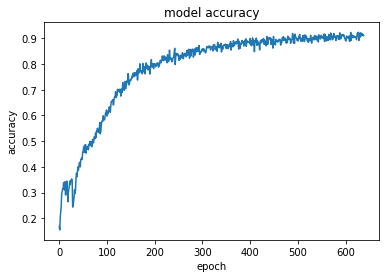

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.savefig('8_class_acc1')
plt.show()


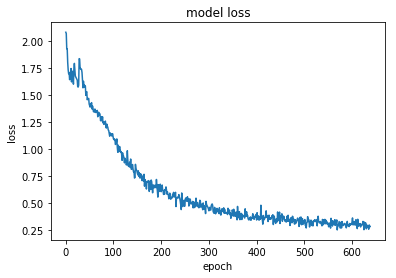

In [19]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.savefig('8_class_loss1')
plt.show()

In [17]:
import json
with open('8_class_history.json', 'w') as f:
    json.dump(history.history, f)